### Introduction to Emotion AI

This is a branch of AI that allow computers to understand human emptions. This project will classify people emotions based on their face images. 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
dataset = pd.read_csv('Data/data.csv')

In [56]:
dataset.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [58]:
dataset.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [59]:
dataset["Image"].shape

(2140,)

In [60]:
'''Convert this value to  2D array of shape (96,96) because the image is of 96x96 pixels'''
dataset["Image"] = dataset["Image"].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape(96,96)) 

In [61]:
dataset["Image"][0].shape

(96, 96)

In [62]:
# calculate the minimum, average and maximum values for the 'right_eye_center_x' column

i_min, i_mean, i_max = dataset['right_eye_center_x'].min(), dataset['right_eye_center_x'].mean(), dataset['right_eye_center_x'].max()

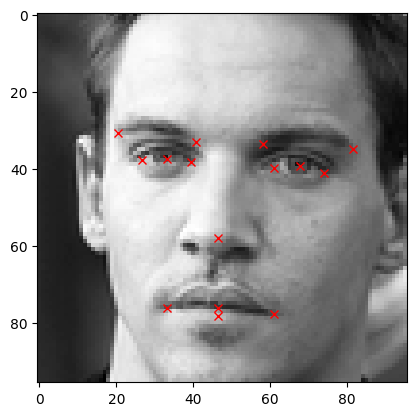

In [63]:
# visualize the distribution of the 'right_eye_center_x' column
i = np.random.randint(1, len(dataset))
plt.imshow(dataset['Image'][i], cmap='gray')

for j in range(1,31,2):
    plt.plot(dataset.loc[i][j-1], dataset.loc[i][j], 'rx')

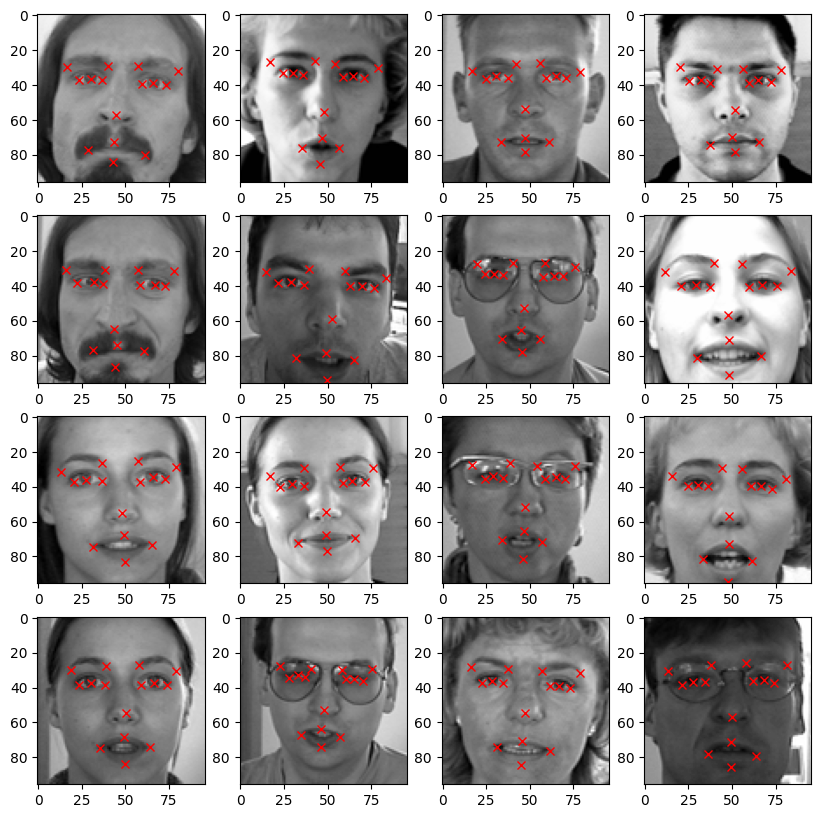

In [64]:
#Print couple more images to see the distribution of the facial keypoints
figures = plt.figure(figsize=(10,10))

for i in range(16):
    ax = figures.add_subplot(4,4,i+1)
    image = plt.imshow(dataset['Image'][i], cmap='gray')
    for j in range(1,31,2):
        plt.plot(dataset.loc[i][j-1], dataset.loc[i][j], 'rx')


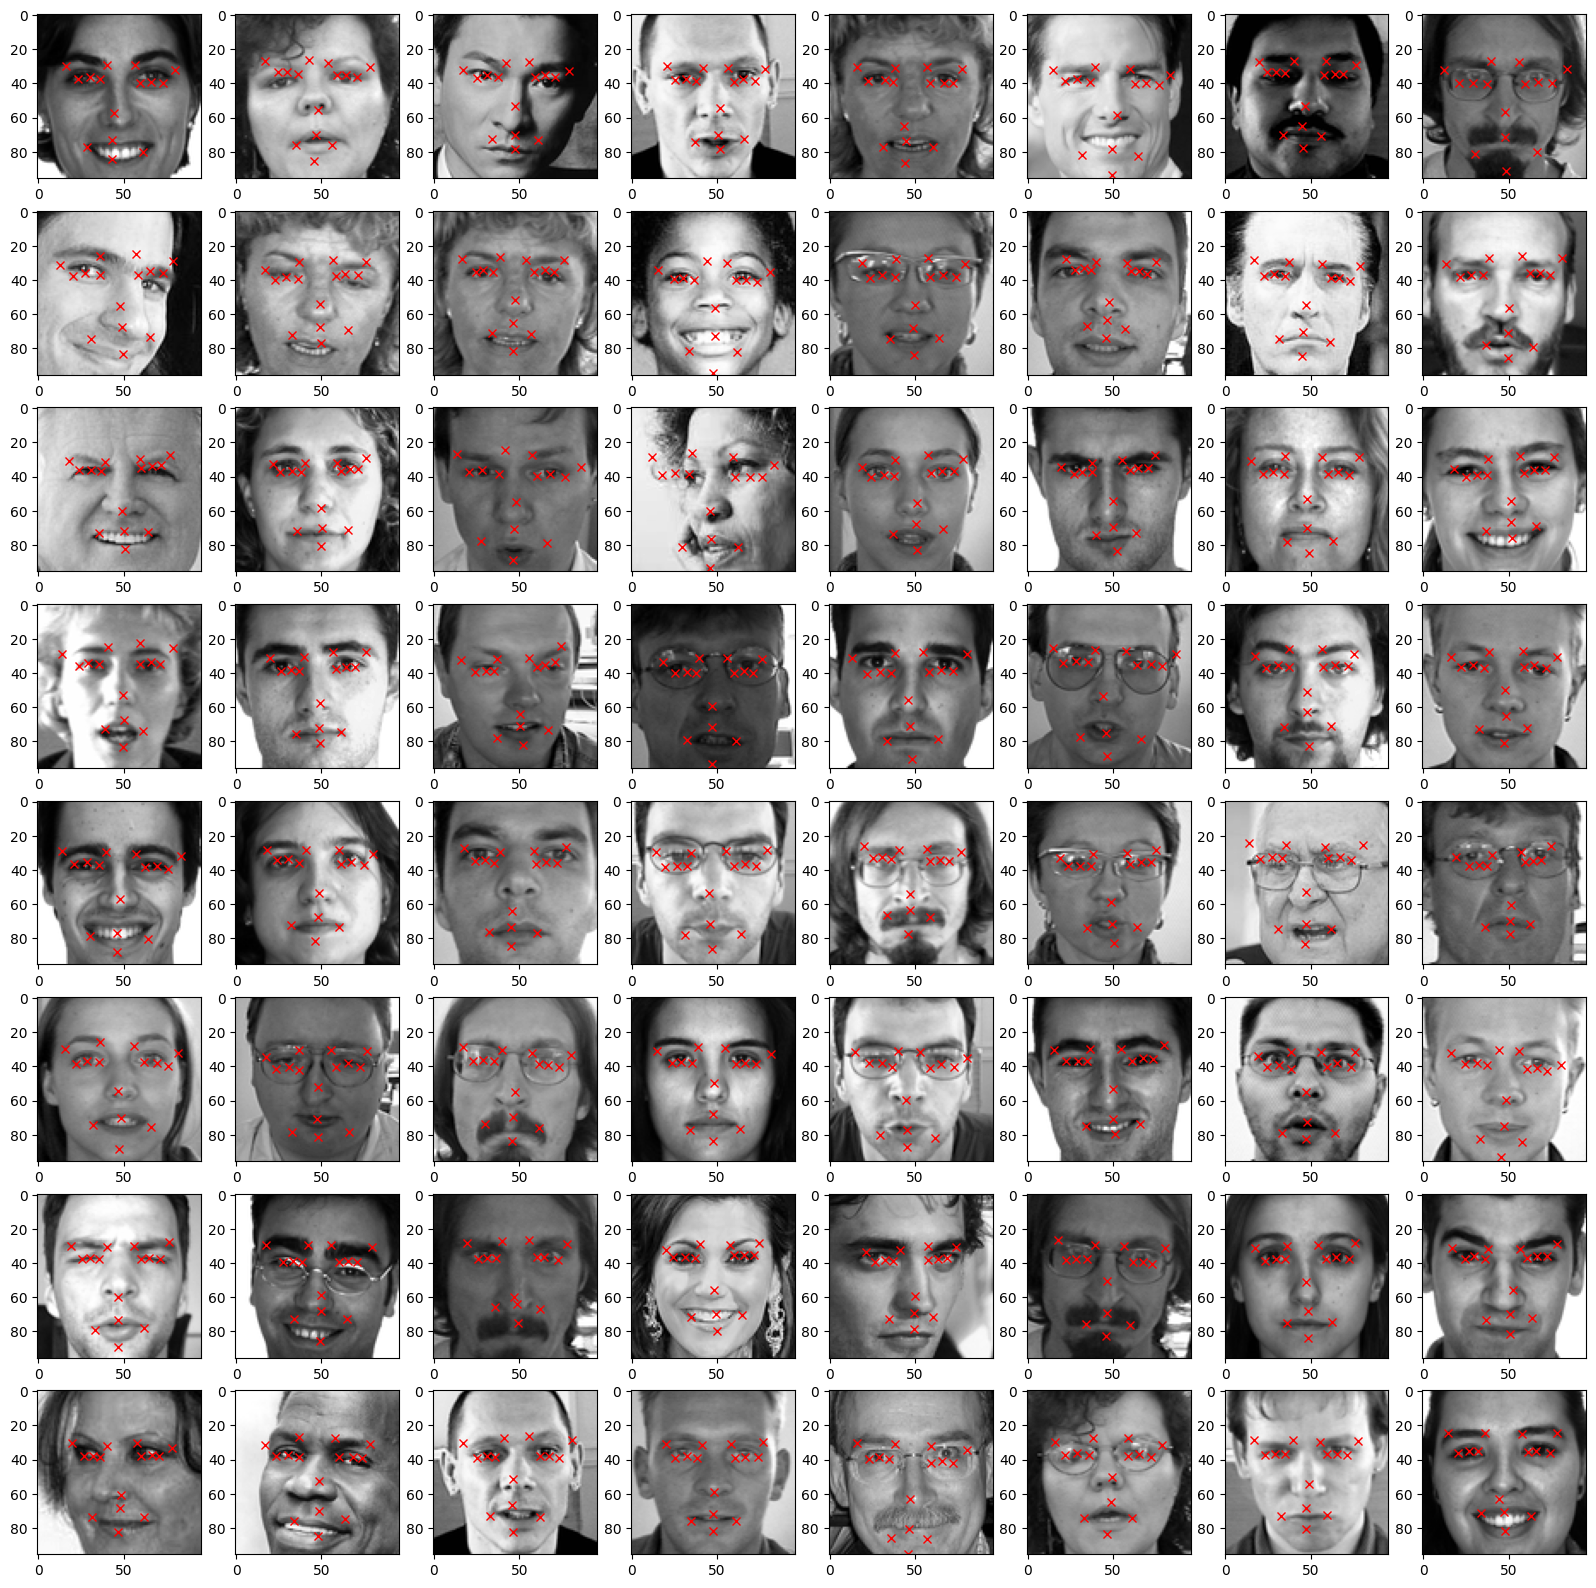

In [65]:
# now validating the distribution of the facial keypoints for 64 random images
import random

figures = plt.figure(figsize=(20,20))

for i in range(64):
    ax = figures.add_subplot(8,8,i+1)
    image = plt.imshow(dataset['Image'][random.randint(1,len(dataset))], cmap='gray')
    for j in range(1,31,2):
        plt.plot(dataset.loc[i][j-1], dataset.loc[i][j], 'rx')

### Performing Image Augmentation

So we are going to try different scenario like how our model is performing when image is size, dark, flipped, bright etc. So we wanted to improve generalization model.

In [66]:
import copy

dataset_cp = copy.copy(dataset)

In [67]:
# get all data except the image
columns = dataset_cp.columns[:-1]

In [68]:
# flip image horizontally only
dataset_cp['Image'] = dataset_cp['Image'].apply(lambda x: np.flip(x, axis=1))

# flip the keypoints horizontally too, since we are flipping the image horizontally our y coordinates will remain same
for i in range(0, len(columns), 2): # each x columns
    dataset_cp[columns[i]] = dataset_cp[columns[i]].apply(lambda x:96. - float(x))

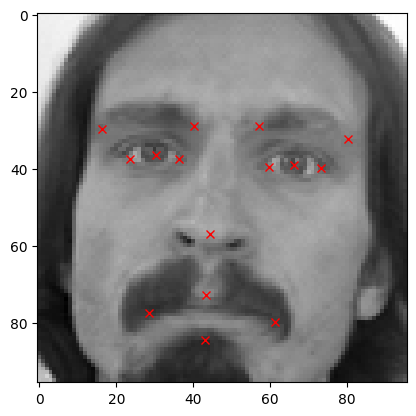

In [69]:
# print the original image and the flipped image
plt.imshow(dataset['Image'][0], cmap='gray')
for j in range(1,31,2):
    plt.plot(dataset.loc[0][j-1], dataset.loc[0][j], 'rx')

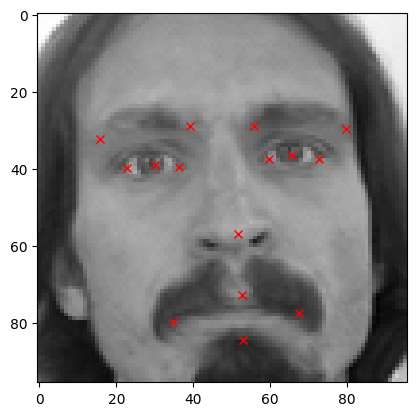

In [70]:
# print the flipped image
plt.imshow(dataset_cp['Image'][0], cmap='gray')
for j in range(1,31,2):
    plt.plot(dataset_cp.loc[0][j-1], dataset.loc[0][j], 'rx')

In [71]:
# radomly increaseing the brightness of the image
augmented_dataset = np.concatenate((dataset, dataset_cp))
augmented_dataset.shape

(4280, 31)

In [72]:
# radomly increaseing the brightness of the image
# we will multiply the image by a random number between 1.5 and 2 to increase the brightness of the image
# and to make sure that the image pixel values are between 0 and 255 we will clip the values to 0 and 255
dataset_cp = copy.copy(dataset)
dataset_cp["Image"] = dataset_cp["Image"].apply(lambda x: np.clip(random.uniform(1.5,2)*x, 0, 255))
augmented_dataset = np.concatenate((augmented_dataset, dataset_cp))
augmented_dataset.shape

(6420, 31)

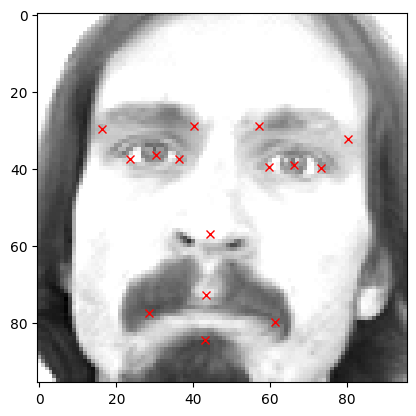

In [73]:
#plot the augmented image

plt.imshow(dataset_cp['Image'][0], cmap='gray')
for j in range(1,31,2):
    plt.plot(dataset_cp.loc[0][j-1], dataset_cp.loc[0][j], 'rx')

### Flipping the image now vertically

In [75]:
dataset_cp_v = copy.copy(dataset)

In [76]:
# flip image horizontally only
dataset_cp_v['Image'] = dataset_cp_v['Image'].apply(lambda y: np.flip(y, axis=0))

# flip the keypoints horizontally too, since we are flipping the image horizontally our y coordinates will remain same
for i in range(0, len(columns)): # each y columns
    if i % 2 != 0:
        dataset_cp_v[columns[i]] = dataset_cp_v[columns[i]].apply(lambda y:96. - float(y))

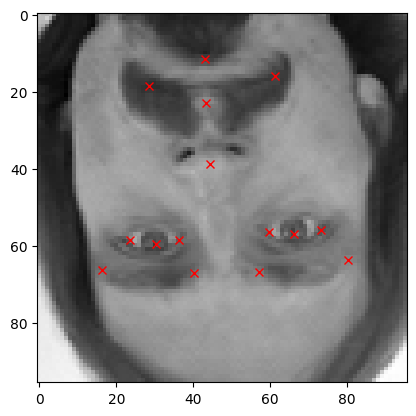

In [77]:
# print the vertically flipped image
plt.imshow(dataset_cp_v['Image'][0], cmap='gray')
for j in range(1,31,2):
    plt.plot(dataset_cp_v.loc[0][j-1], dataset_cp_v.loc[0][j], 'rx')